In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir(r"R:\Data Science Top mentor\Cohort 127_ML_ Day 48\Stremlit Deployment and PBI Dashboard")

In [4]:
car_data = pd.read_csv("car_data.csv")
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Invoice Price,Used/New Price,Body Size,Body Style,Cylinders,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Highway Fuel Economy
0,0,Aston Martin,DBX707,2024,Base,"$242,000",NaN,"$242,000",Large,SUV,V8,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,20 mpg
1,1,Audi,A3,2024,Premium w/40 TFSI,"$35,800","$33,653","$35,800",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg
2,2,Audi,A3,2024,Premium w/40 TFSI,"$37,800","$35,533","$37,800",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,"$41,400","$38,917","$41,400",Compact,Sedan,I4,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,34 mpg
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,"$39,400","$37,037","$39,400",Compact,Sedan,I4,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,37 mpg


In [5]:
print("Shape of Data: ",car_data.shape)

Shape of Data:  (1610, 17)


In [6]:
print("Summary")
car_data.info()

Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   index                 1610 non-null   int64 
 1   Make                  1610 non-null   object
 2   Model                 1610 non-null   object
 3   Year                  1610 non-null   int64 
 4   Trim                  1610 non-null   object
 5   MSRP                  1610 non-null   object
 6   Invoice Price         1058 non-null   object
 7   Used/New Price        1610 non-null   object
 8   Body Size             1610 non-null   object
 9   Body Style            1610 non-null   object
 10  Cylinders             1445 non-null   object
 11  Engine Aspiration     1610 non-null   object
 12  Drivetrain            1610 non-null   object
 13  Transmission          1610 non-null   object
 14  Horsepower            1605 non-null   object
 15  Torque                1583 non

In [7]:
for column in car_data:
    unique_vals = np.unique(car_data[column].fillna('0'))
    nr_values = len(unique_vals)
    if nr_values <= 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column,nr_values))

The number of values for feature index :1610
The number of values for feature Make :7 -- ['Aston Martin' 'Audi' 'BMW' 'Bentley' 'Ford' 'Mercedes-Benz' 'Nissan']
The number of values for feature Model :150
The number of values for feature Year :2 -- [2023 2024]
The number of values for feature Trim :373
The number of values for feature MSRP :1317
The number of values for feature Invoice Price :944
The number of values for feature Used/New Price :1317
The number of values for feature Body Size :3 -- ['Compact' 'Large' 'Midsize']
The number of values for feature Body Style :12 -- ['Cargo Minivan' 'Cargo Van' 'Convertible' 'Convertible SUV' 'Coupe'
 'Hatchback' 'Passenger Minivan' 'Passenger Van' 'Pickup Truck' 'SUV'
 'Sedan' 'Wagon']
The number of values for feature Cylinders :10 -- ['0' 'I3' 'I4' 'I5' 'I6' 'V10' 'V12' 'V6' 'V8' 'W12']
The number of values for feature Engine Aspiration :6 -- ['Electric Motor' 'Naturally Aspirated' 'Supercharged' 'Turbocharged'
 'Twin-Turbo' 'Twincharged']

In [8]:
print("Missing Data:/n")
print(car_data.isnull().sum())

Missing Data:/n
index                     0
Make                      0
Model                     0
Year                      0
Trim                      0
MSRP                      0
Invoice Price           552
Used/New Price            0
Body Size                 0
Body Style                0
Cylinders               165
Engine Aspiration         0
Drivetrain                0
Transmission              0
Horsepower                5
Torque                   27
Highway Fuel Economy    424
dtype: int64


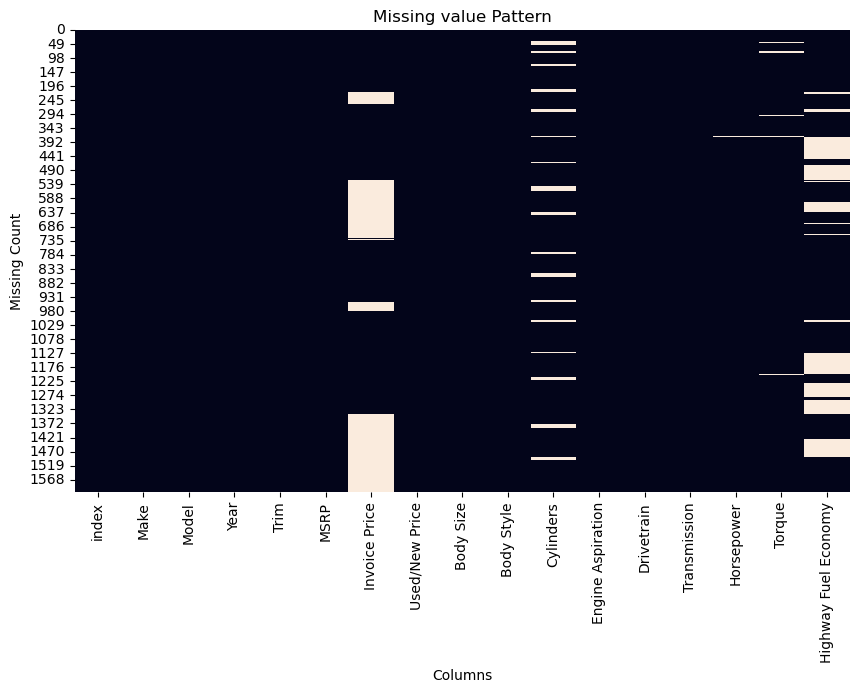

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(car_data.isna(),cbar=False)
plt.title("Missing value Pattern")
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.show()

In [10]:
car_data = car_data.drop(['Invoice Price', 'Cylinders', 'Highway Fuel Economy'], axis=1)
print(car_data.isnull().sum())

index                 0
Make                  0
Model                 0
Year                  0
Trim                  0
MSRP                  0
Used/New Price        0
Body Size             0
Body Style            0
Engine Aspiration     0
Drivetrain            0
Transmission          0
Horsepower            5
Torque               27
dtype: int64


In [11]:
car_data['Horsepower_No'] = car_data['Horsepower'].str[0:3].astype(float)
display(car_data[['Horsepower', 'Horsepower_No']])

,Horsepower,Horsepower_No
0,697 hp @ 6000 rpm,697.0
1,201 hp @ 4800 rpm,201.0
2,201 hp @ 5000 rpm,201.0
3,201 hp @ 5000 rpm,201.0
4,201 hp @ 4800 rpm,201.0
...,...,...
1605,400 hp @ 6400 rpm,400.0
1606,400 hp @ 6400 rpm,400.0
1607,400 hp @ 6400 rpm,400.0
1608,400 hp @ 6400 rpm,400.0


In [12]:
display (car_data[car_data['Horsepower_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No
371,971,Ford,F-150 Lightning,2024,Flash,"$67,995","$67,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
372,972,Ford,F-150 Lightning,2024,Lariat,"$76,995","$76,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
373,973,Ford,F-150 Lightning,2024,Platinum,"$84,995","$84,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
374,974,Ford,F-150 Lightning,2024,Pro,"$54,995","$54,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN
375,975,Ford,F-150 Lightning,2024,XLT,"$62,995","$62,995",Large,Pickup Truck,Electric Motor,4WD,automatic,NaN,NaN,NaN


In [13]:
mean_Horsepower = car_data['Horsepower_No'][car_data['Make'] == 'Ford'].mean()
print(mean_Horsepower)

333.2254428341385


In [14]:
car_data['Horsepower_No'] = car_data['Horsepower_No'].fillna(mean_Horsepower)
car_data['Horsepower'] = car_data['Horsepower'].fillna(mean_Horsepower)
display (car_data[car_data['Horsepower_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No


In [15]:
car_data['Torque_No'] = car_data['Torque'].str[0:3].astype(float)
display (car_data[['Torque', 'Torque_No']])

,Torque,Torque_No
0,663 ft-lbs. @ 2750 rpm,663.0
1,221 ft-lbs. @ 4100 rpm,221.0
2,221 ft-lbs. @ 4000 rpm,221.0
3,221 ft-lbs. @ 4000 rpm,221.0
4,221 ft-lbs. @ 4100 rpm,221.0
...,...,...
1605,350 ft-lbs. @ 1600 rpm,350.0
1606,350 ft-lbs. @ 1600 rpm,350.0
1607,350 ft-lbs. @ 1600 rpm,350.0
1608,350 ft-lbs. @ 1600 rpm,350.0


In [16]:
display(car_data[car_data['Torque_No'].isna()])

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
42,42,Audi,Q4 Sportback e-tron,2024,Premium w/55,"$58,200","$58,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
44,44,Audi,Q4 Sportback e-tron,2024,Premium Plus w/55,"$62,900","$62,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
46,46,Audi,Q4 Sportback e-tron,2024,Prestige w/55,"$65,200","$65,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
49,49,Audi,Q4 e-tron,2024,Premium w/55,"$55,200","$55,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
52,52,Audi,Q4 e-tron,2024,Premium Plus w/55,"$59,900","$59,900",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
54,54,Audi,Q4 e-tron,2024,Prestige w/55,"$62,200","$62,200",Midsize,SUV,Electric Motor,AWD,automatic,335 hp @ 0 rpm,NaN,335.000000,NaN
75,75,Audi,Q8 Sportback e-tron,2024,Premium Plus S line,"$82,200","$82,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
76,76,Audi,Q8 Sportback e-tron,2024,Premium S line,"$77,800","$77,800",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
77,77,Audi,Q8 Sportback e-tron,2024,Prestige S line,"$88,200","$88,200",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN
78,78,Audi,Q8 e-tron,2024,Premium,"$74,400","$74,400",Midsize,SUV,Electric Motor,AWD,automatic,402 hp @ 0 rpm,NaN,402.000000,NaN


In [17]:
car_data['Torque_No'] = car_data['Torque_No'].fillna(
    car_data.groupby('Make')['Torque_No'].transform('mean')
)
# I USE THIS BEACUSE AS WE SEE HERE TORQUE IS MISSING FOR VARIOUS MODEL(MAKE) SO AS PER MODEL THE TORQUE GET VARY SO
# I USE THIS TO AVOID NOISENESS OF DATA 

In [18]:
car_data['MSRP'] = car_data['MSRP'].str.replace('$','')
car_data['MSRP'] = car_data['MSRP'].str.replace(',','').astype(float)
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,"$242,000",Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,"$35,800",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,"$37,800",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,"$41,400",Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,"$39,400",Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0


In [19]:
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace('$','')
car_data['Used/New Price'] = car_data['Used/New Price'].str.replace(',','').astype(float)
car_data.head()

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0


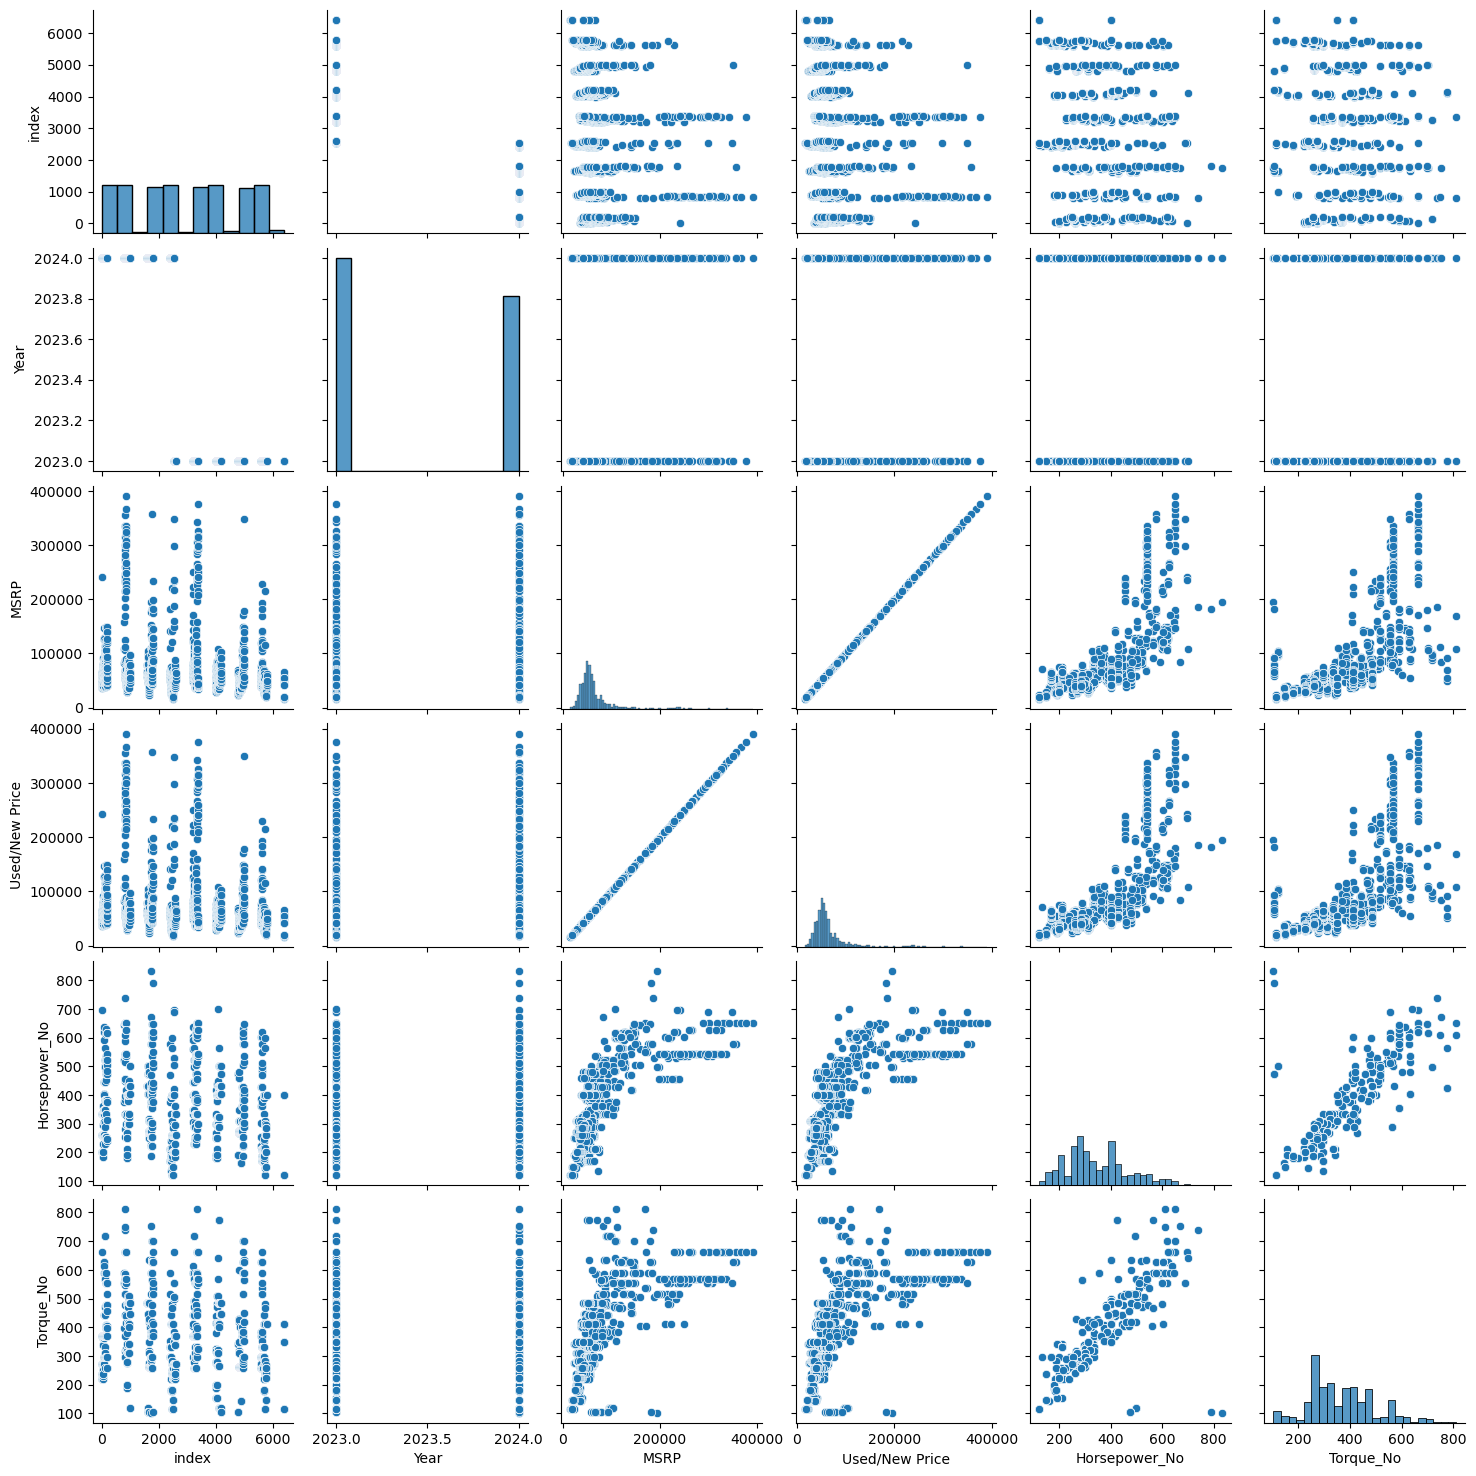

In [20]:
sns.pairplot(car_data)
plt.show()

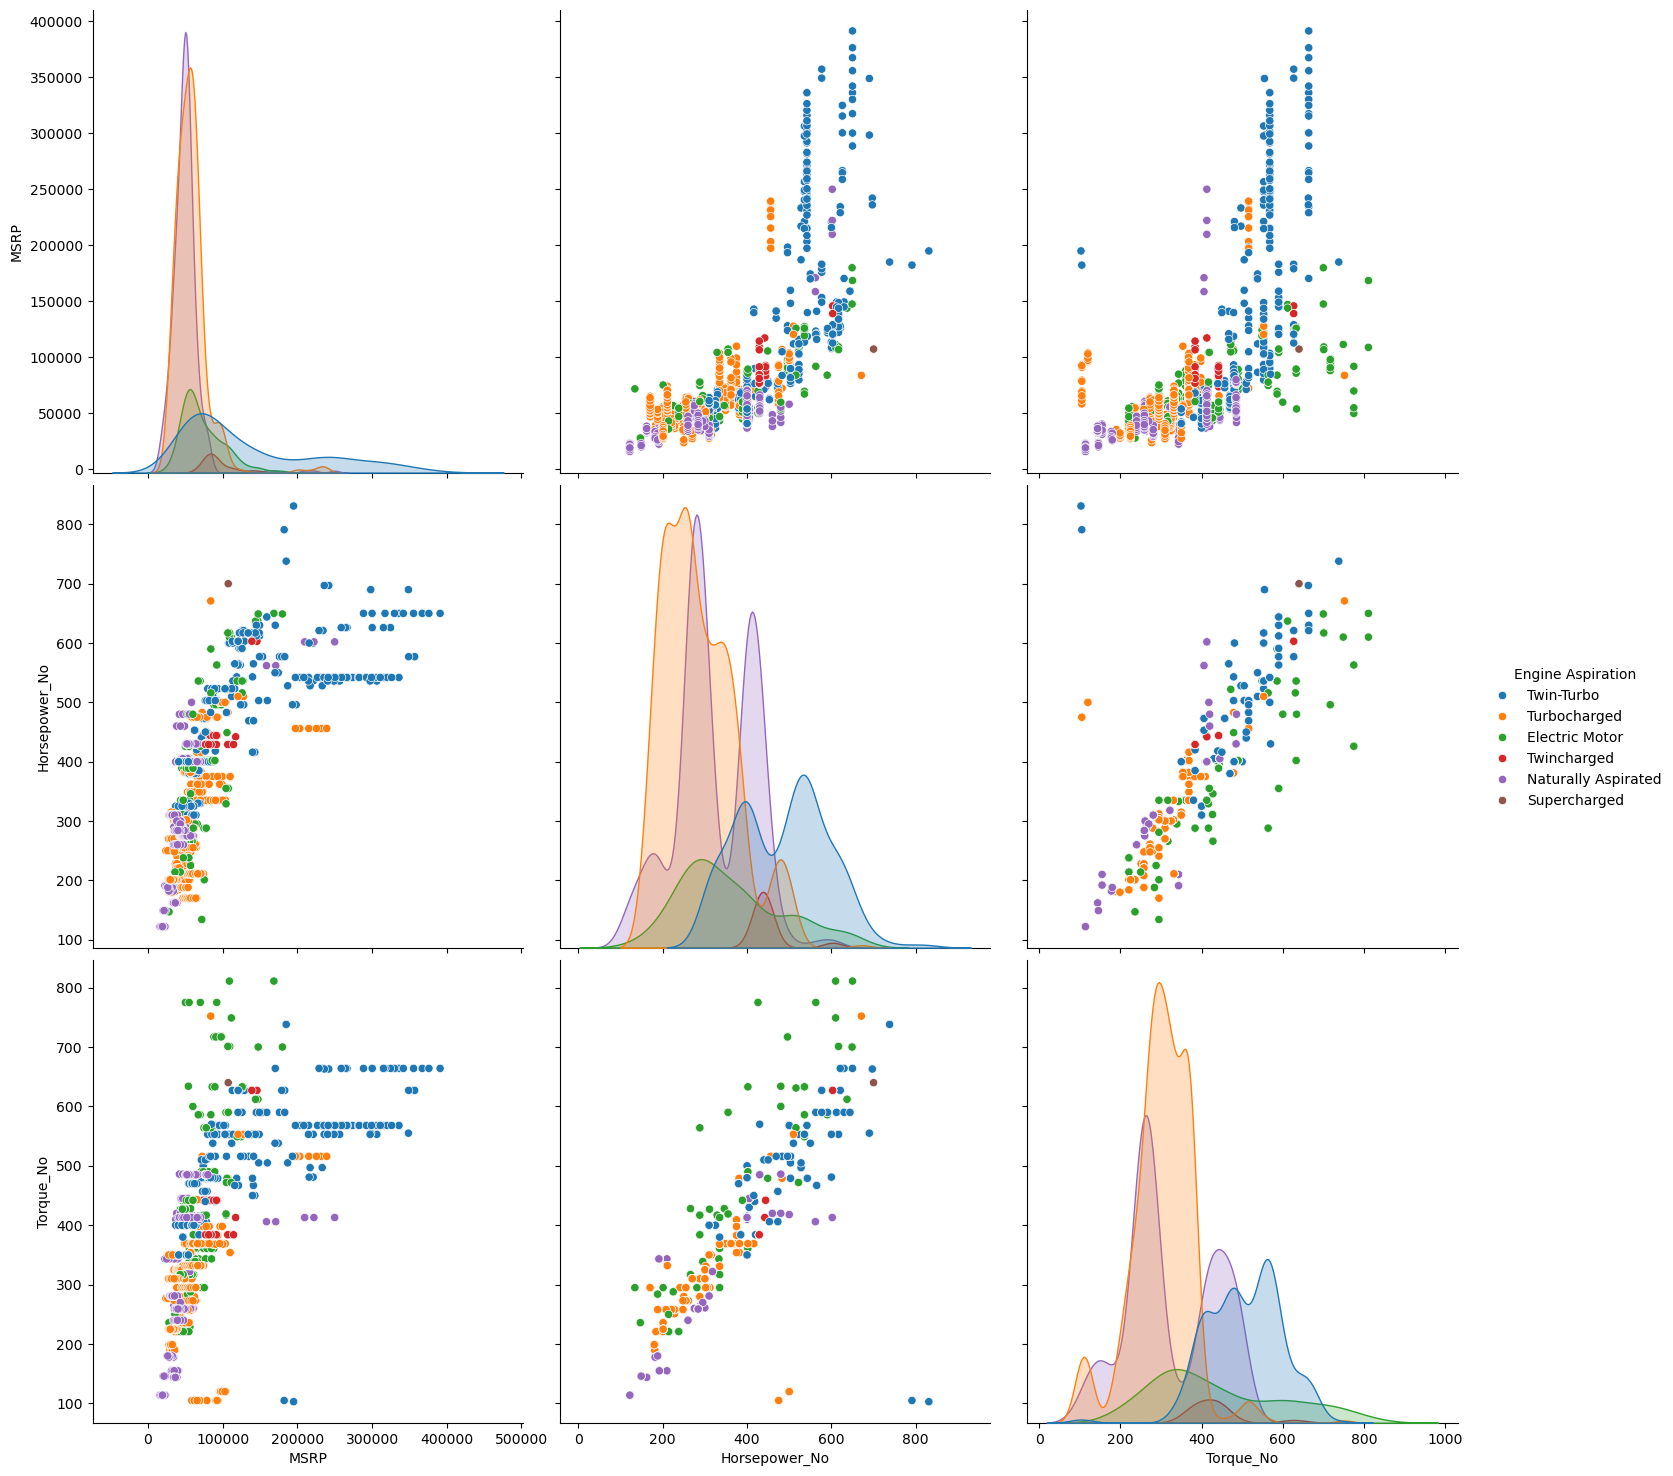

In [21]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Engine Aspiration']], hue ='Engine Aspiration', height=5)
plt.show()

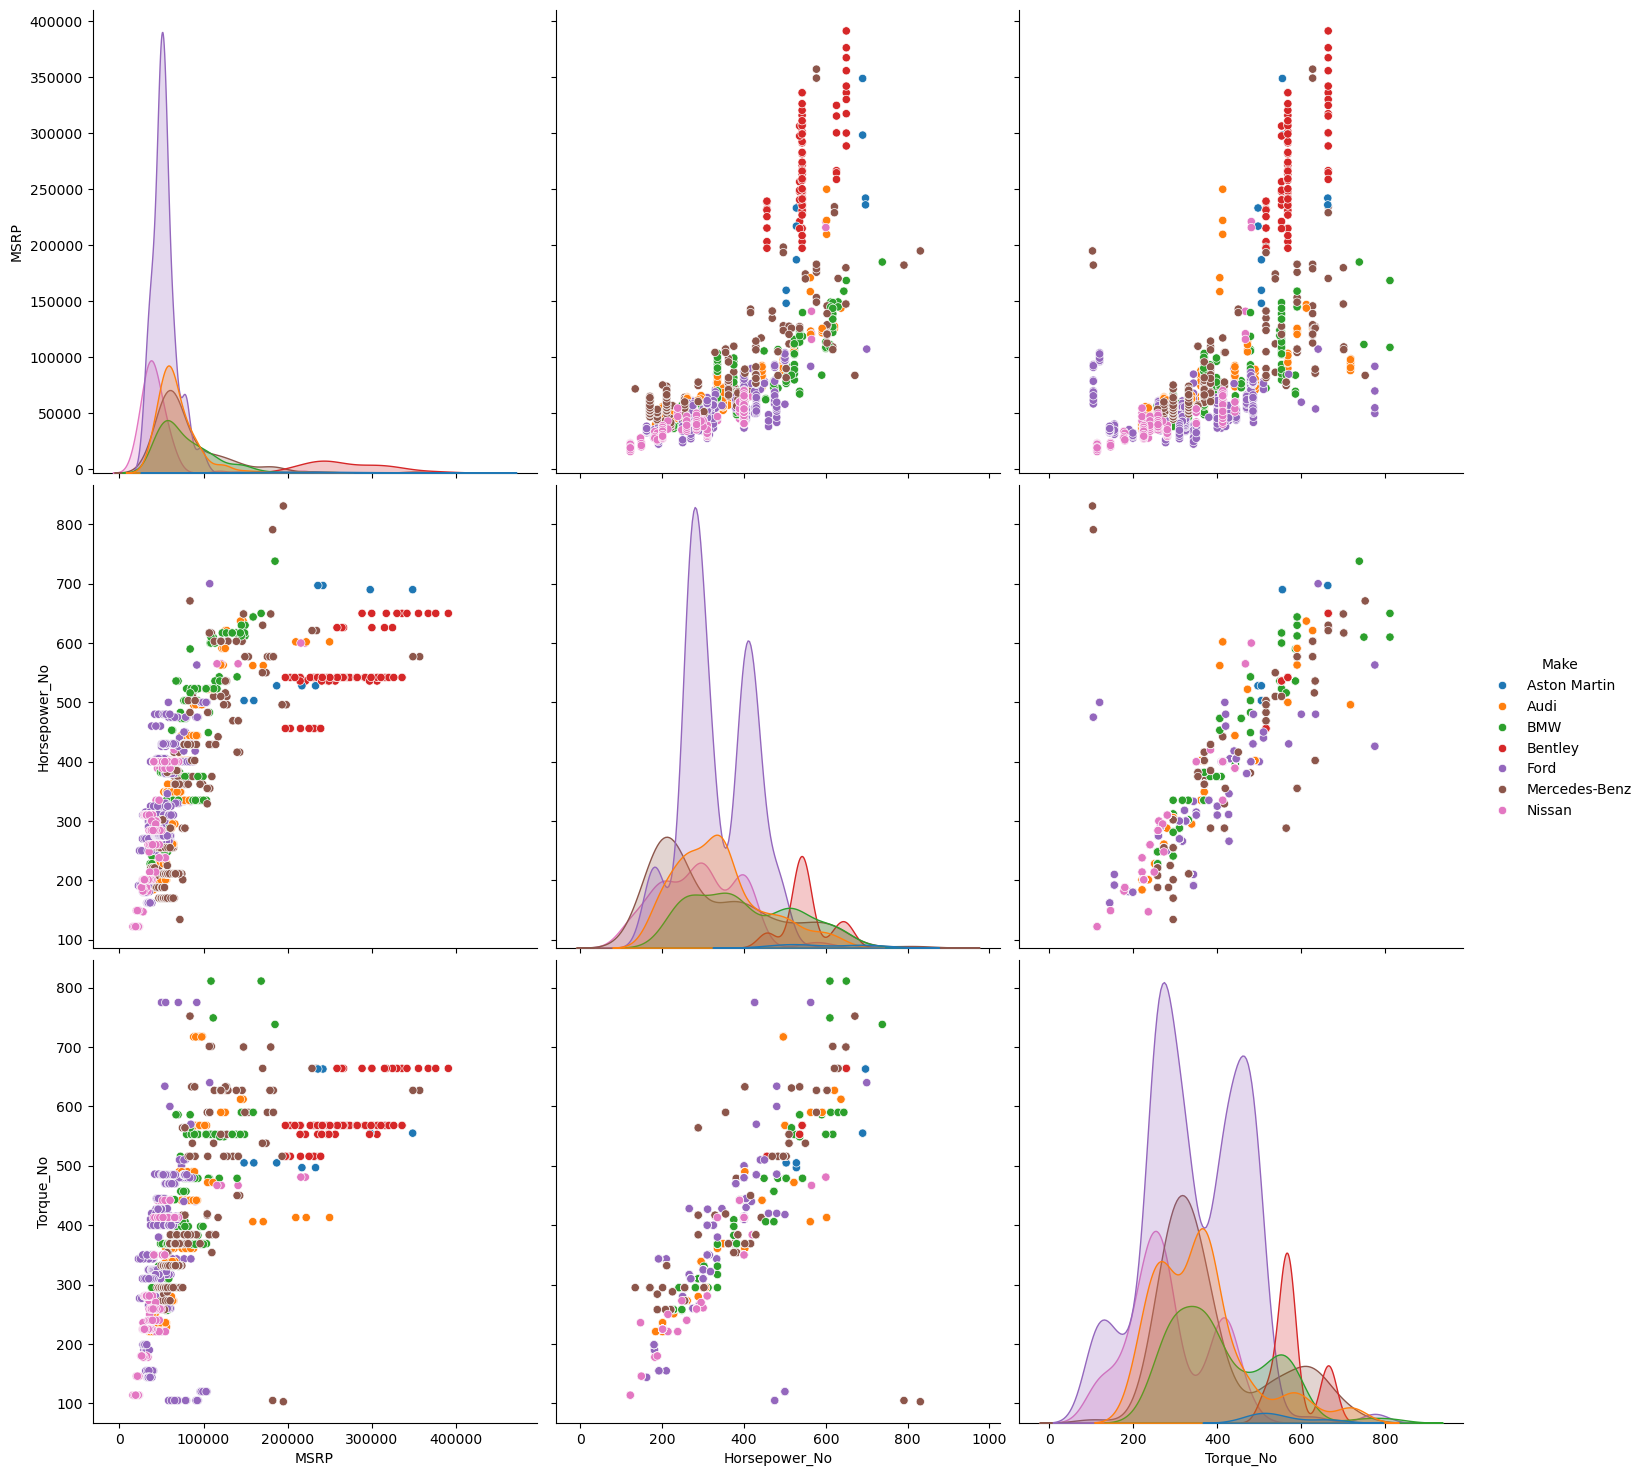

In [22]:
sns.pairplot(car_data[['MSRP', 'Horsepower_No', 'Torque_No', 'Make']], hue ='Make', height=5)
plt.show()

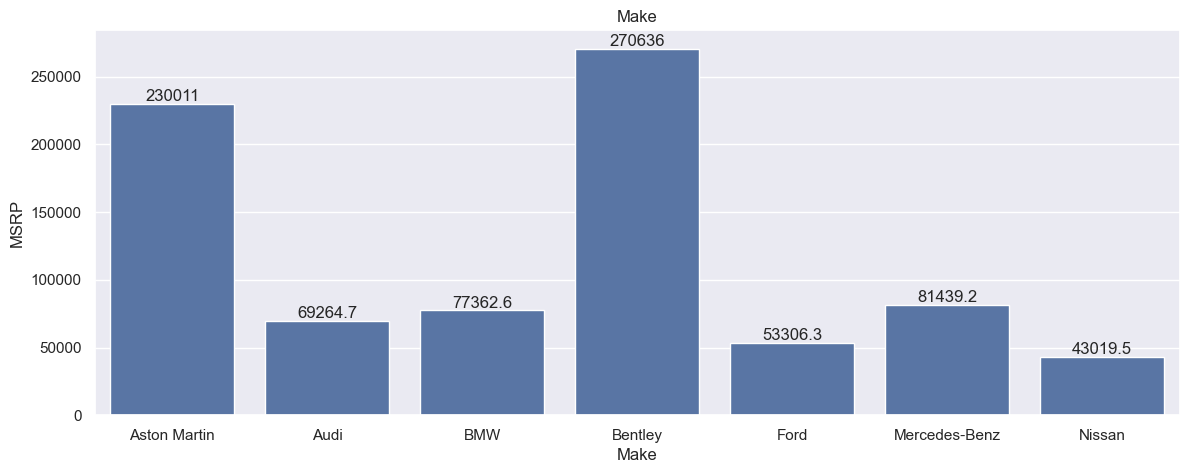

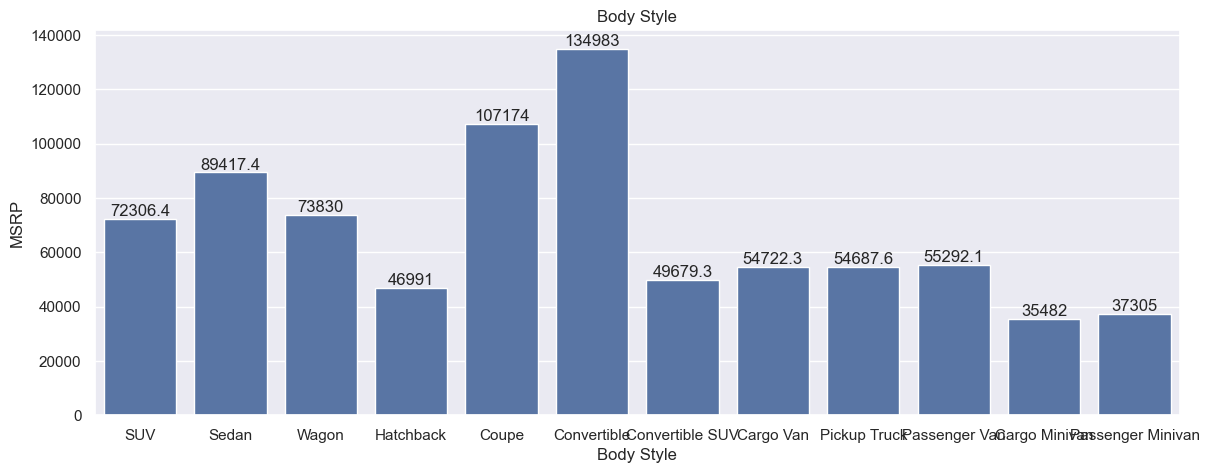

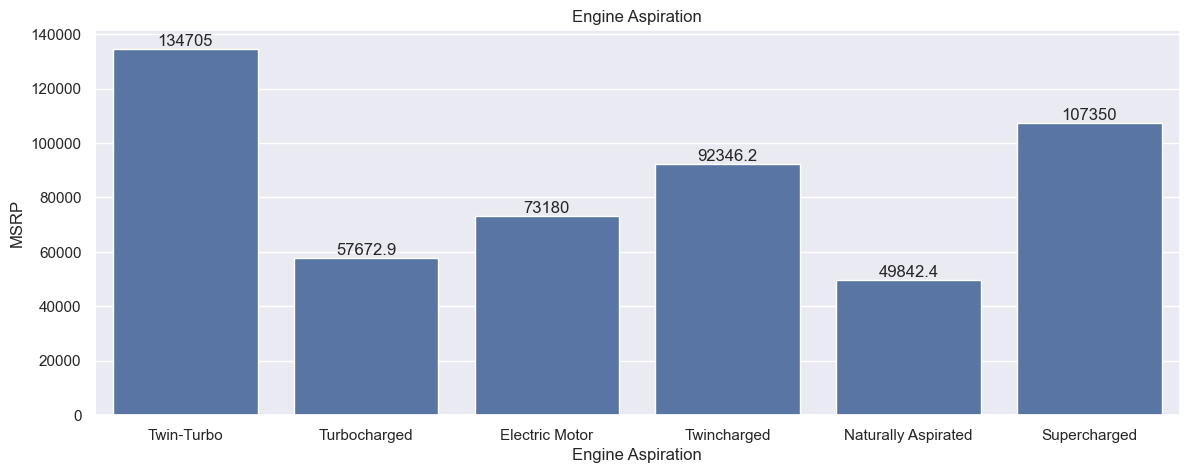

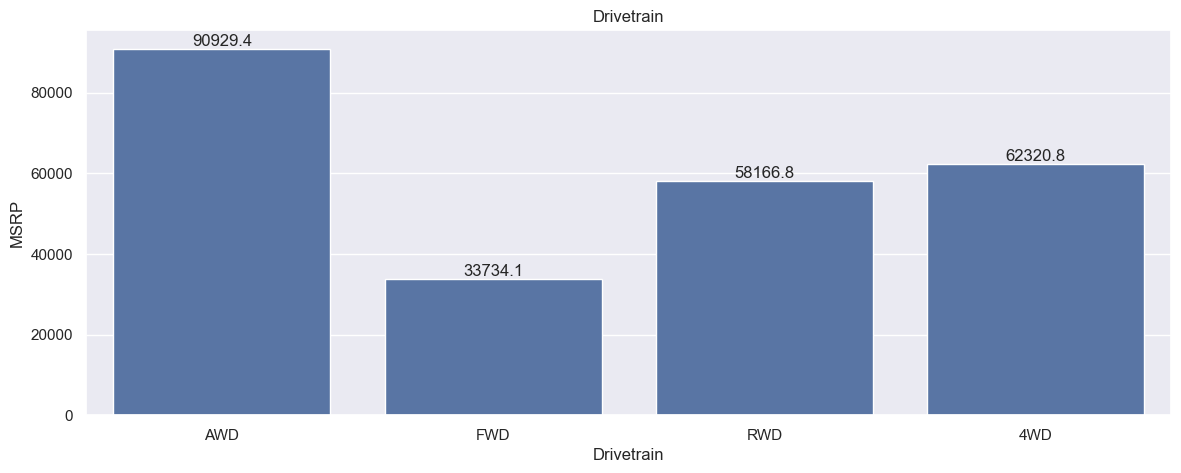

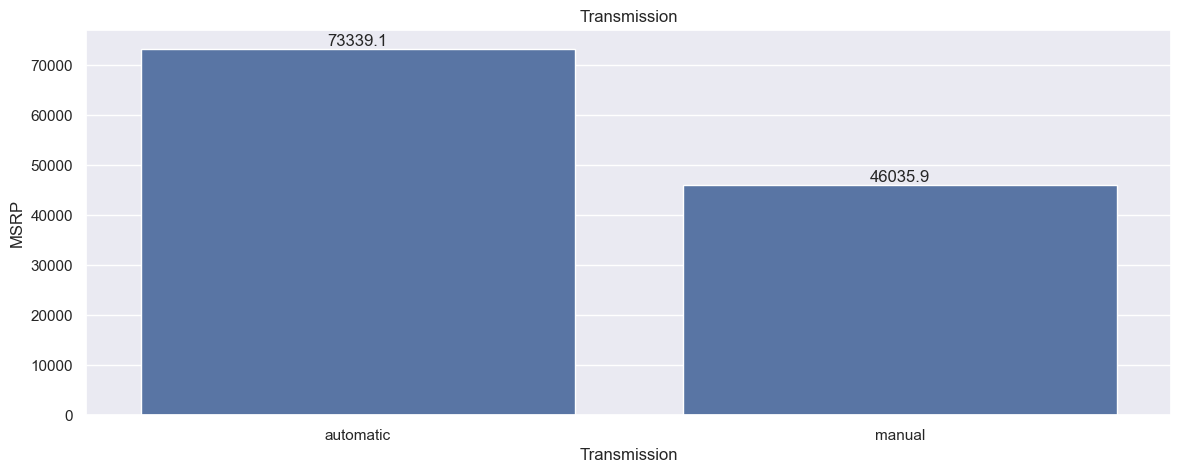

In [23]:
categories = ['Make', 'Body Style', 'Engine Aspiration', 'Drivetrain', 'Transmission']

sns.set(rc={'figure.figsize':(14,5)})

for c in categories:
    ax = sns.barplot(
        x = c,
        y = "MSRP",
        data = car_data,
        errorbar = ('se', False))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

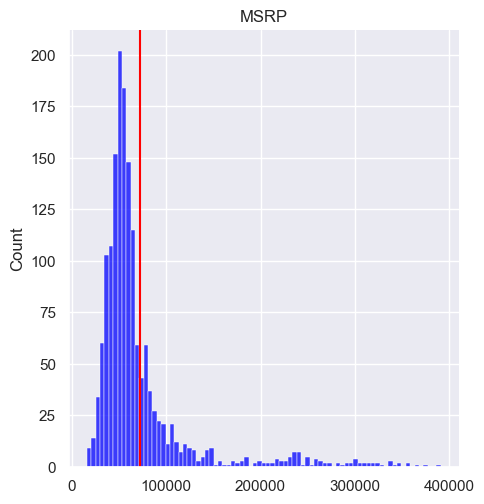

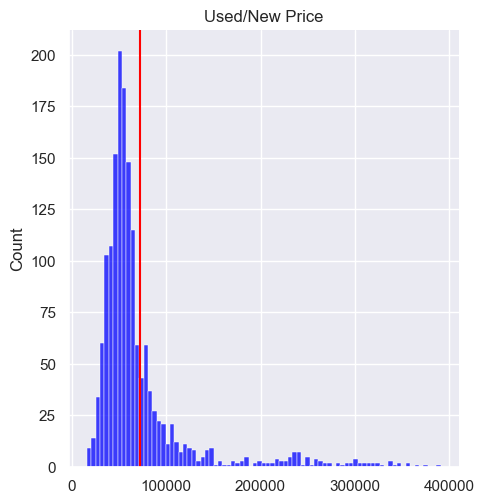

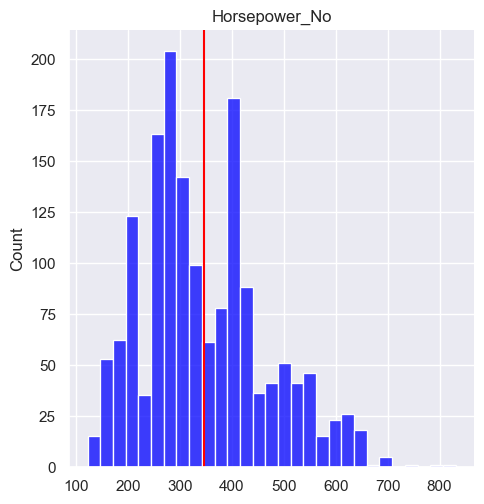

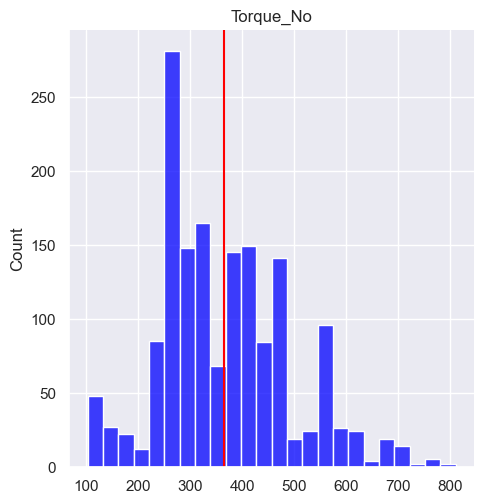

In [24]:
n_variables = ['MSRP', 'Used/New Price', 'Horsepower_No', 'Torque_No']
sns.set(rc = {'figure.figsize':(10,5)})

for n in n_variables:
    x = car_data[n].values
    sns.displot(x,color='blue');
    mean = car_data[n].mean()

    plt.axvline(x=mean, ymin = 0, ymax = 1, color = 'red')
    plt.title(n)
    plt.show()

The Median of MSRP :  55945.0


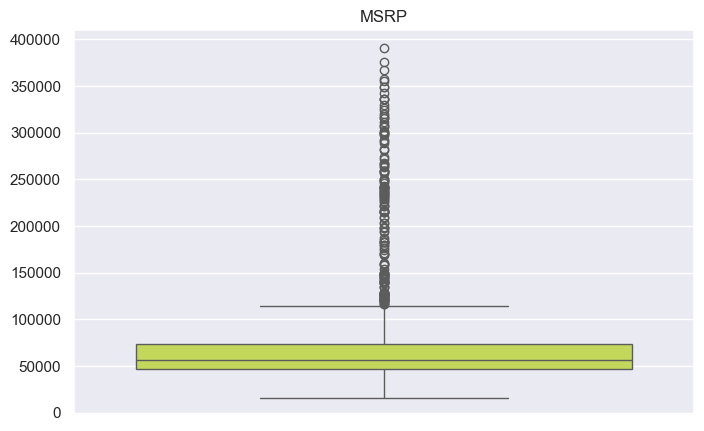

The Median of Used/New Price :  55945.0


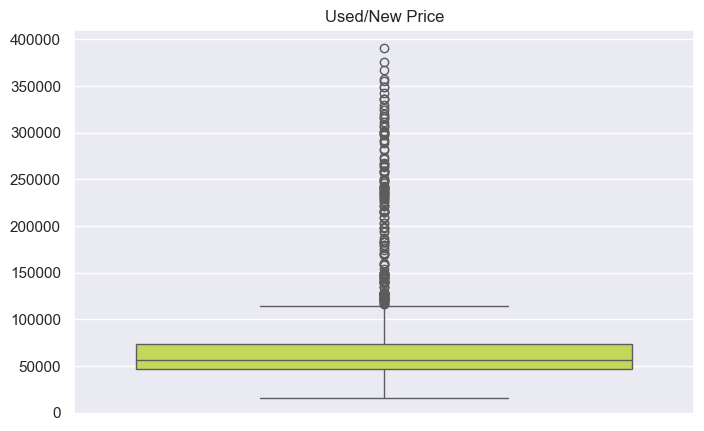

The Median of Horsepower_No :  325.0


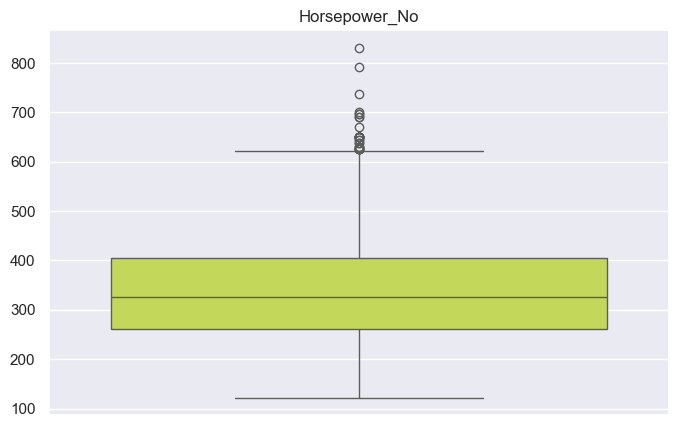

The Median of Torque_No :  343.3888888888889


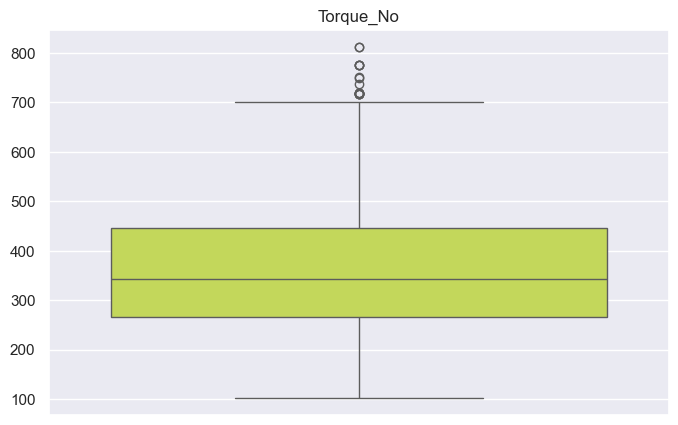

In [25]:
sns.set(rc={'figure.figsize':(8,5)})
for c in n_variables:
    x = car_data[c].values
    ax = sns.boxplot(x,color = '#D1EC46')
    print('The Median of',c,': ', car_data[c].median())
    plt.title(c)
    plt.show()

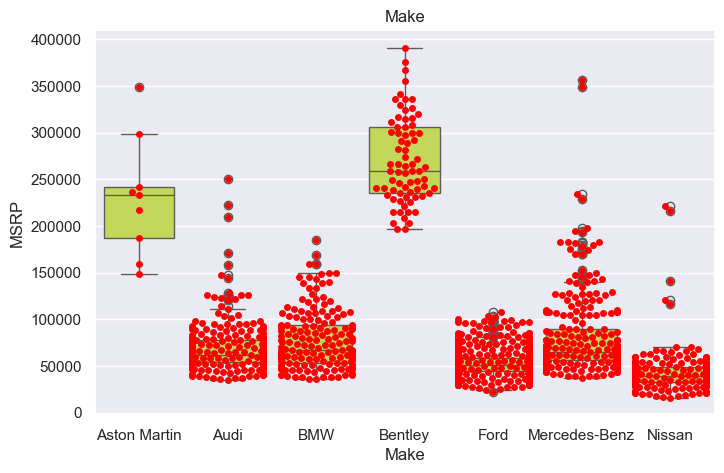

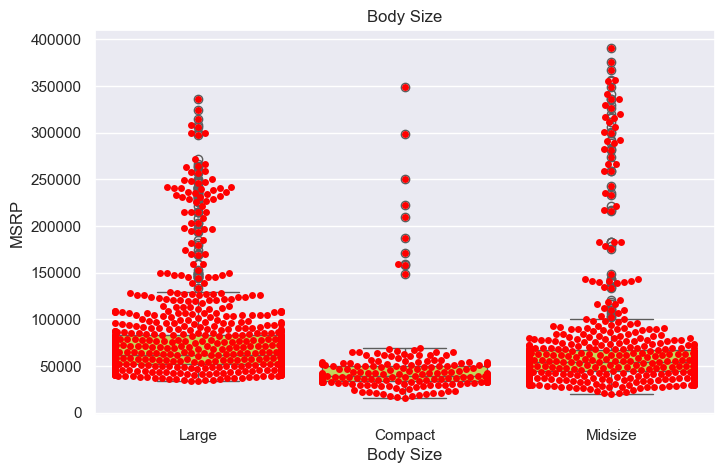

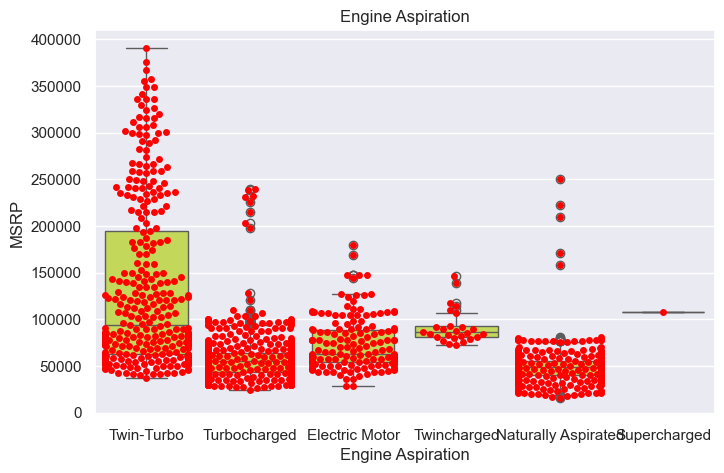

ValueError: Could not interpret value `Drietrain` for `x`. An entry with this name does not appear in `data`.

In [27]:
import warnings
warnings.filterwarnings('ignore')

categories = ['Make', 'Body Size', 'Engine Aspiration', 'Drietrain', 'Transmission']

sns.set(rc={'figure.figsize':(8,5)})
for c in categories:
    ax = sns.boxplot(x=c, y ="MSRP", data = car_data, color = "#D1EC46")
    ax = sns.swarmplot(x=c, y ="MSRP", data = car_data, color = "red")
    plt.title(c)
    plt.show()

In [35]:
new_car_data = car_data.drop(['index', 'Model', 'Year', 'Trim', 'Used/New Price', 'Horsepower', 'Torque'], axis = 1)
display(new_car_data)

,Make,MSRP,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower_No,Torque_No
0,Aston Martin,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697.0,663.0
1,Audi,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
2,Audi,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
3,Audi,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201.0,221.0
4,Audi,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201.0,221.0
...,...,...,...,...,...,...,...,...,...
1605,Nissan,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1606,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400.0,350.0
1607,Nissan,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0
1608,Nissan,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400.0,350.0


In [51]:
new_car_data = pd.get_dummies(new_car_data, 
                             columns=[col for col in ['Make', 'Body Size', 'Body Style', 
                                                     'Engine Aspiration', 'Drivetrain', 'Transmission'] 
                                     if col in new_car_data.columns], 
                             dtype='int')
new_car_data.head()

,MSRP,Horsepower_No,Torque_No,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Ford,Make_Mercedes-Benz,Make_Nissan,...,Body Style_Convertible,Body Style_Convertible SUV,Body Style_Coupe,Body Style_Hatchback,Body Style_Passenger Minivan,Body Style_Passenger Van,Body Style_Pickup Truck,Body Style_SUV,Body Style_Sedan,Body Style_Wagon
0,242000.0,697.0,663.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,35800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,37800.0,201.0,221.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,41400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,39400.0,201.0,221.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
n_variables = ['MSRP', 'Horsepower_No', 'Torque_No']
pc = new_car_data[n_variables].corr(method = 'pearson')
print(pc)

                   MSRP  Horsepower_No  Torque_No
MSRP           1.000000       0.703226   0.620646
Horsepower_No  0.703226       1.000000   0.786699
Torque_No      0.620646       0.786699   1.000000


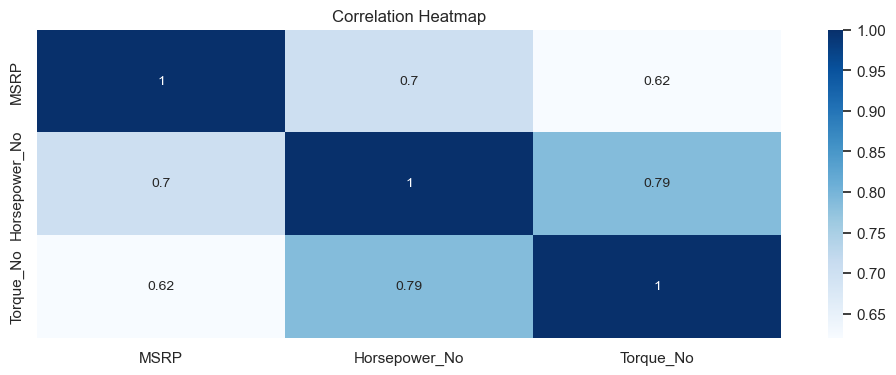

In [56]:
sns.set(rc = {'figure.figsize':(12,4)})
cols = n_variables
ax = sns.heatmap(pc, annot= True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues"                
                )
plt.title("Correlation Heatmap")
plt.show()

In [57]:
X = new_car_data.drop(["MSRP"], axis=1).values
print(X.shape)

(1610, 36)


In [58]:
y = new_car_data["MSRP"].astype(int)
print(y.shape)

(1610,)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.80, test_size= 0.2, random_state= 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(1288, 36)
(322, 36)
(1288,)
(322,)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

In [62]:
# Training the Regression model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [63]:
ytrain_prd = lm.predict(X_train)
print(ytrain_prd)

[ 57076.77625142  20767.50071562 303378.82684571 ...  83225.8993789
  60421.74711209  65184.91070272]


In [64]:
ytest_prd = lm.predict(X_test)
print(ytest_prd)

[ 65230.89636434  67709.87478063  14687.53519138  52234.83397172
  68709.08482964 112712.28023059  48932.96207865  74565.65452455
 106172.18018635 108404.02149004  65450.95993778  29126.28440429
  81429.48719507  46681.22033444  21842.69712462  47757.20881204
  50552.39090525  88316.77366142  59113.08846725  60665.71545065
 105113.59117162  59113.08846725 125944.12409896  91987.31598416
 106172.18018635  69263.10355685  52672.92272297  50032.20650438
  46681.22033444 281159.92343767  18361.72785157 281159.92343767
  96482.23275909  65230.89636434  32427.91079458  35536.40709638
  60421.74711209  32427.91079458  16046.29161528 151065.3217442
  50032.20650438 138741.67804847 264984.28777243  52976.82271283
  52241.30019479  49922.70326138 125403.4121719   63441.90805714
  18361.72785157  38087.14929484  80278.18315791  62846.17891967
  67819.37802364  31525.44316681  86701.5819324   43689.83467372
  52241.30019479 110651.10552285  20767.50071562  69953.91624258
  33054.93591739  33274.82

In [65]:
all_df_predict = lm.predict(X)
print(all_df_predict)

[246314.13887631  46888.24041298  39604.65313331 ...  54492.60618231
  54492.60618231  74689.42567633]


In [66]:
print('The Accuracy on the training dataset is :', lm.score(X_train, y_train))
print('The Accuracy r2 on the training dataset prediction is:', r2_score(y_train, ytrain_prd))
print("")

# model Accuracy on testing dataset
print('The Accuracy on the testing dataset is :', lm.score(X_test, y_test))
print("The Accuracy r2 on the testing dataset prediction is:", r2_score(y_test, ytest_prd))

#model Accuracy on Complete Data Set
print('The Accuracy on the complete dataset is:', lm.score(X,y))
print('The Accuracy r2 on the complete dataset is :', r2_score(y,all_df_predict))

# RMSE(Root mean Squared Error)
print('The RMSE on the training dataset is :', sqrt(mean_squared_error(y_train, ytrain_prd)))
print('The RMSE on the testing dataset is :', sqrt(mean_squared_error(y_test, ytest_prd)))
print('The RMSE on the Complete dataset is :', sqrt(mean_squared_error(y,all_df_predict)))

# MAE(Mean Absolute Error)
print('The MAE on the training dataset is :', mean_absolute_error(y_train, ytrain_prd))
print('The MAE on the testing dataset is :', mean_absolute_error(y_test, ytest_prd))
print('The MAE on the Complete dataset is :', mean_absolute_error(y,all_df_predict))

print("")

# Coefficients
print('Coefficients:', lm.coef_)
print("")

# The Intercept
print('Intercept: ', lm.intercept_)

The Accuracy on the training dataset is : 0.9008904203968756
The Accuracy r2 on the training dataset prediction is: 0.9008904203968756

The Accuracy on the testing dataset is : 0.902305459225394
The Accuracy r2 on the testing dataset prediction is: 0.902305459225394
The Accuracy on the complete dataset is: 0.9011553450847873
The Accuracy r2 on the complete dataset is : 0.9011553450847873
The RMSE on the training dataset is : 17416.650205618393
The RMSE on the testing dataset is : 16598.26362135168
The RMSE on the Complete dataset is : 17256.07819165963
The MAE on the training dataset is : 10622.980672932132
The MAE on the testing dataset is : 10242.681679867032
The MAE on the Complete dataset is : 10546.920874319112

Coefficients: [ 2.21586594e+02 -1.78380082e+01  6.67520700e+04 -3.14319404e+04
 -3.78545912e+04  1.16824277e+05 -4.64739175e+04 -2.06334193e+04
 -4.71824785e+04  7.05715963e+02 -7.20619241e+02  1.49032774e+01
  3.59242977e+03 -1.72313769e+03 -7.27595761e-12 -2.22840108e+03

In [67]:
car_data['MSRP Predictions'] = all_df_predict
car_data.to_excel('Car_Data_with_pred.xlsx')
display(car_data)

,index,Make,Model,Year,Trim,MSRP,Used/New Price,Body Size,Body Style,Engine Aspiration,Drivetrain,Transmission,Horsepower,Torque,Horsepower_No,Torque_No,MSRP Predictions
0,0,Aston Martin,DBX707,2024,Base,242000.0,242000.0,Large,SUV,Twin-Turbo,AWD,automatic,697 hp @ 6000 rpm,663 ft-lbs. @ 2750 rpm,697.0,663.0,246314.138876
1,1,Audi,A3,2024,Premium w/40 TFSI,35800.0,35800.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,46888.240413
2,2,Audi,A3,2024,Premium w/40 TFSI,37800.0,37800.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,39604.653133
3,3,Audi,A3,2024,Premium Plus w/40 TFSI,41400.0,41400.0,Compact,Sedan,Turbocharged,AWD,automatic,201 hp @ 5000 rpm,221 ft-lbs. @ 4000 rpm,201.0,221.0,39604.653133
4,4,Audi,A3,2024,Premium Plus w/40 TFSI,39400.0,39400.0,Compact,Sedan,Turbocharged,FWD,automatic,201 hp @ 4800 rpm,221 ft-lbs. @ 4100 rpm,201.0,221.0,46888.240413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,6410,Nissan,Z,2023,Performance,50990.0,50990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,74689.425676
1606,6411,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,automatic,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,74689.425676
1607,6412,Nissan,Z,2023,Proto Spec,53990.0,53990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,54492.606182
1608,6413,Nissan,Z,2023,Sport,40990.0,40990.0,Compact,Coupe,Twin-Turbo,RWD,manual,400 hp @ 6400 rpm,350 ft-lbs. @ 1600 rpm,400.0,350.0,54492.606182


In [69]:
import pickle
pickle.dump(lm, open('linear_model.pkl','wb'))

In [70]:
model = pickle.load(open('linear_model.pkl','rb'))
# prediction
print(model.predict(X_test))

[ 65230.89636434  67709.87478063  14687.53519138  52234.83397172
  68709.08482964 112712.28023059  48932.96207865  74565.65452455
 106172.18018635 108404.02149004  65450.95993778  29126.28440429
  81429.48719507  46681.22033444  21842.69712462  47757.20881204
  50552.39090525  88316.77366142  59113.08846725  60665.71545065
 105113.59117162  59113.08846725 125944.12409896  91987.31598416
 106172.18018635  69263.10355685  52672.92272297  50032.20650438
  46681.22033444 281159.92343767  18361.72785157 281159.92343767
  96482.23275909  65230.89636434  32427.91079458  35536.40709638
  60421.74711209  32427.91079458  16046.29161528 151065.3217442
  50032.20650438 138741.67804847 264984.28777243  52976.82271283
  52241.30019479  49922.70326138 125403.4121719   63441.90805714
  18361.72785157  38087.14929484  80278.18315791  62846.17891967
  67819.37802364  31525.44316681  86701.5819324   43689.83467372
  52241.30019479 110651.10552285  20767.50071562  69953.91624258
  33054.93591739  33274.82

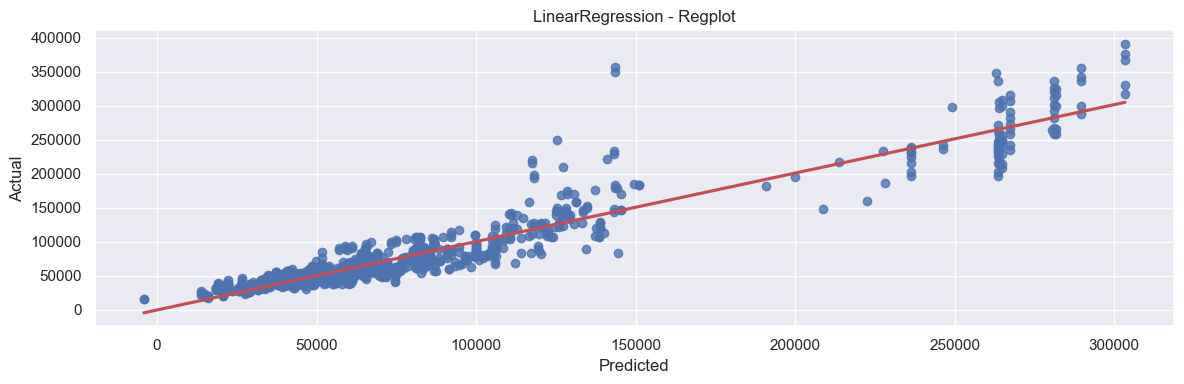

In [77]:

sns.regplot(x = all_df_predict, y = y,
           scatter_kws={"color": "b"},
    line_kws={"color": "r"},
    ci=None)
plt.title("LinearRegression - Regplot")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
